# Chapter 2 Arrays 

## 2.1 The Array Structure
* **A *one-dimensional array* is composed of multiple sequential elements stored in contiguous bytes of memory and allows for random access to the individual elements**
    * **Indvidual elements within the array can be accessed directly by specifying an integer subscript or index value, which indicates an offset from the start of the array**
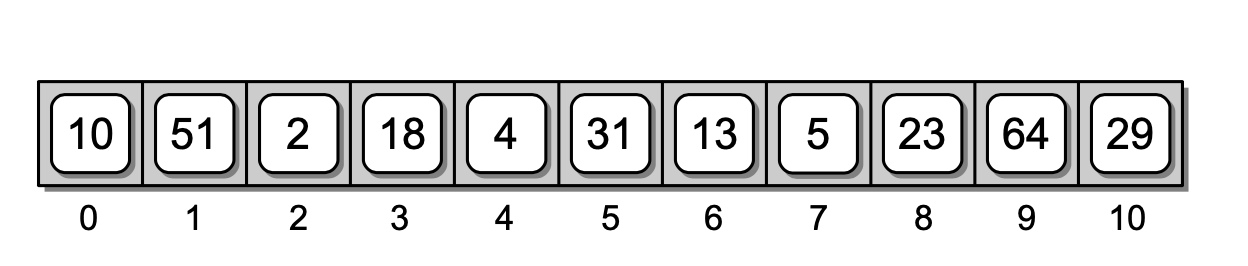

### 2.1.1 Why Study Arrays
* **Arrays vs. List**
1. **An array has a limited number of operations, which commonly include those for array creation, reading a value from a specific element, and writing a value to a specific element**
1. **The list provides a large number of operations for working with the contents of the list.**
1. **The list can grow and shrink during execution as elements are added or removed while the size of an array cannot be changed after it has created.**
1. **The array is best suited for problem requiring a sequence in which the maximum number of elements are known up front, whereas the list is the better choice when the size of the sequence needs to change after it has been created.**

### 2.1.2 The Array Abstract Data Type
* **Array ADT: A *one-dimensional* array is collection of contiguous elements in which individual elements are identified by a unique integer subscript starting with zero. Once an array is created, its size cannot be changed.**
* Array( size ): **creates a one-dimensional array consisting** size **elements with each element initally set to** None. size **must be greater than zero.**
* length(): **return the length or number of elements in the array.**
* getitem( index ): **returns the value stored in the array at the element position** index. **The** index argument **must be within the valid range. Accessed using the subscript operator.**
* setitem(index, value): **modifies the contents of the array element at position** index **to contain** value. **The** index **must be within the valid range. Accessed using the subscript operator**
* clearing( value ): **clears the array by setting every element to** value.
* iterator( ): **creates and returns an iterator that can be used to traverse the elements of the array.**

### 2.1.3 Implementing the Array
#### The $ctypes$ Module
* **Python include the $ctypes$ module as part of the PythonStandardLibrary. This module provides access to the diverse set of data types availiable in the C language and complete functionality provded by a wide range of C libararies.**

#### Creating a Hardware Array
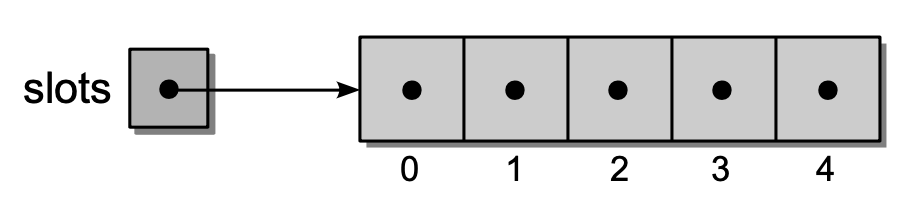
* **The size of the array can never change, so removing an item from an array has no effect on the size of the array or on the itesm stored in other elements**

In [2]:
# Creates an array named slots that contains five elements
import ctypes

ArrayType = ctypes.py_object * 5
slots = ArrayType()

# initialize the elements inside the array to None
for i in range( 5 ):
    slots[i] = None

    
# populating the array
slots[1] = 12
slots[3] = 54
slots[4] = 37

#reove an item from the array
slots[3] = None


#### The Class Definition
* **The** \_\_len\_\_ **method, which returns the number of elements in the array.**
* **The \_\_iter\_\_ creates and returns an instance of the private iterator class.**
* **The \_\_getitem\_\_ methos is called when the subscript notation is used**
* **The \_\_setitem\_\_ operator method is used to set or change the contents of a specific element of the array. Python automatically calls the \_\_setitem\_\_ method when the subscript notation is used to assign a value to a specific element.**

In [6]:
# implements the Array ADT using array capabilities of the ctypes module
import ctypes

class Array:
#     creates an array with size elements
    def __init__( self, size ):
        assert size > 0, "Array size must be > 0"
        self._size = size
#         create the array structure using the ctypes module
        PyArrayType = ctypes.py_object * size
        self._elements = PyArrayType()
#       initialize each element
        self.clear(None)
    
#     returns the size of the array
    def __len__( self ):
        return self._size
    
#     gets the contents of the array
    def __getitem__( self, index ):
        assert index >= 0 and index < len(self), "Array subscript out of range"
        return self._elements[ index ]
    
#   puts the value in the array element at index position
    def __setitem__( self, index, value ):
        assert index >= 0 and index < len(self), "Array subscript out of range"
        self._elements[ index ] = value
        
# clears the array by setting each element to the given value
    def clear( self, value ):
        for i in range( len( self ) ):
            self._elements[i] == value
            
# returns the array's iterator for traversing the elements
    def __iter__( self ):
        return _ArrayIterator( self._elements )
    
# creates the Iterator class for the array ADT
class _ArrayIterator:
    def __init__( self, theArray ):
        self._arrayRef = theArray
        self._curNdx = 0
        
    def __iter__( self ):
        return self
    
    def __next__( self ):
        if self._curNdx < len(self._arrayRef) :
            entry = self._arrayRef[self._curNdx]
            _curNdx += 1
            return entry
        else :
            raise StopIteration

## 2.2 The Python List
* **Python's list structure is a mutable sequence container that can change size as items are added or removed. It is an abstract data type that is implemented using an array structure to store the items contained in the list** 

### 2.2.1 Creating a Python list

In [7]:
pyList = [ 4, 12, 2, 34, 17 ]

* **When the list( ) constructor is called, an array structure is created to store the items contained in the list.**
* **The array is initially created bigger than needed, leaving capacity for future expansion.**
* **The value stored in the list comprise a *subarray* in which only a contiguous subset of the array elements are actually used.**
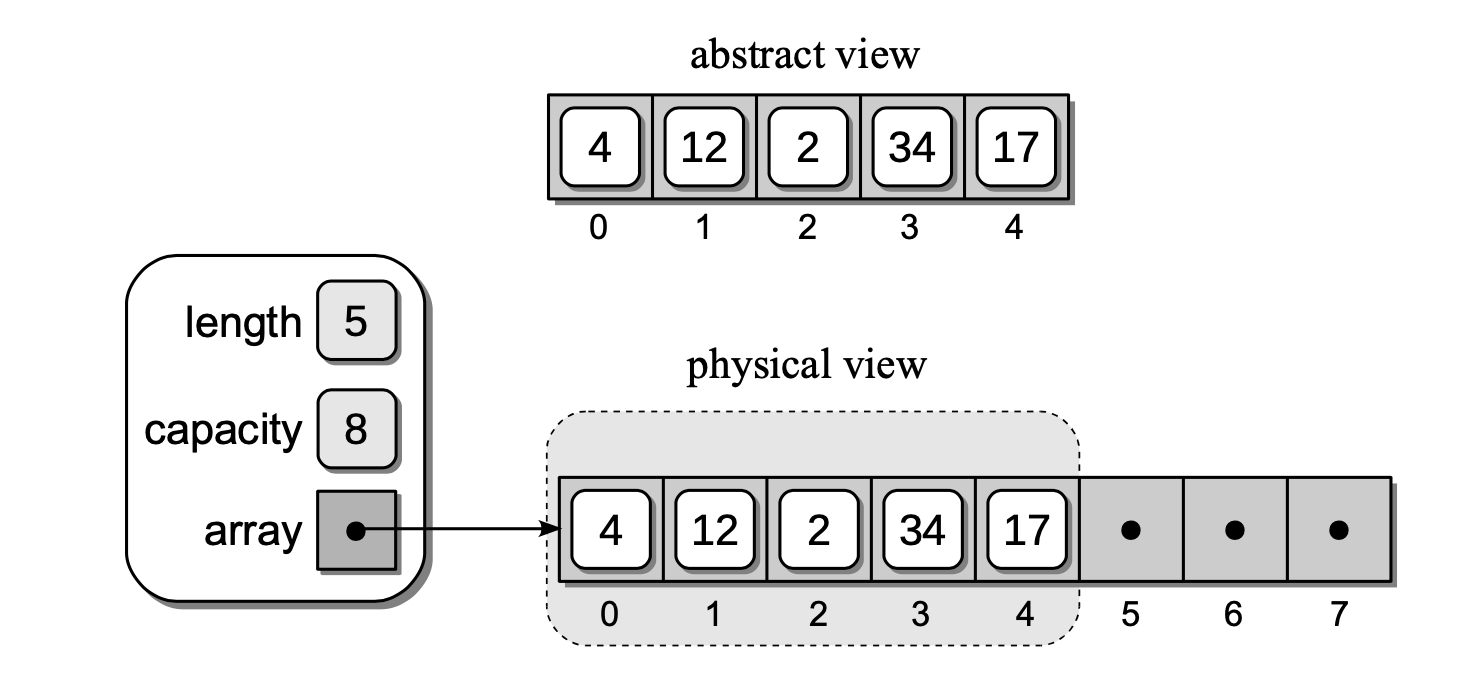

### 2.2.2 Appending Items
* **If there is room in the array, the item is stored in the next availiable slot of the array and the length field is incremented by one.**
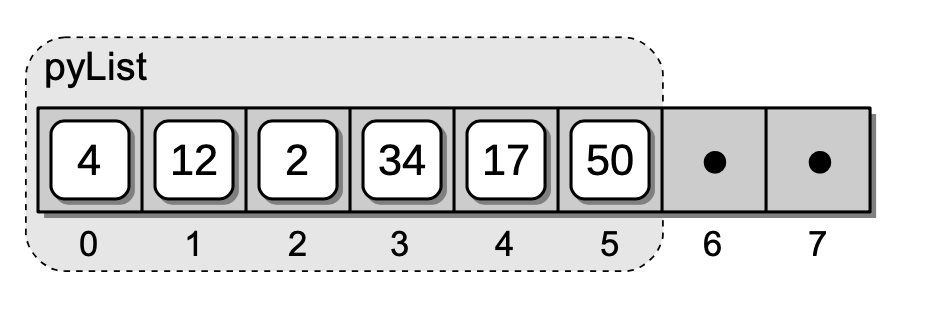
* **When the array becomes full and there are no free elements in whicch to add a new list item:**
    * **A new array is created with additional capacity**
    * **The items from the original array are copied to the new array**
    * **The new larger array is set as the data structure for the list**
    * **The original smaller array is destroyed.**
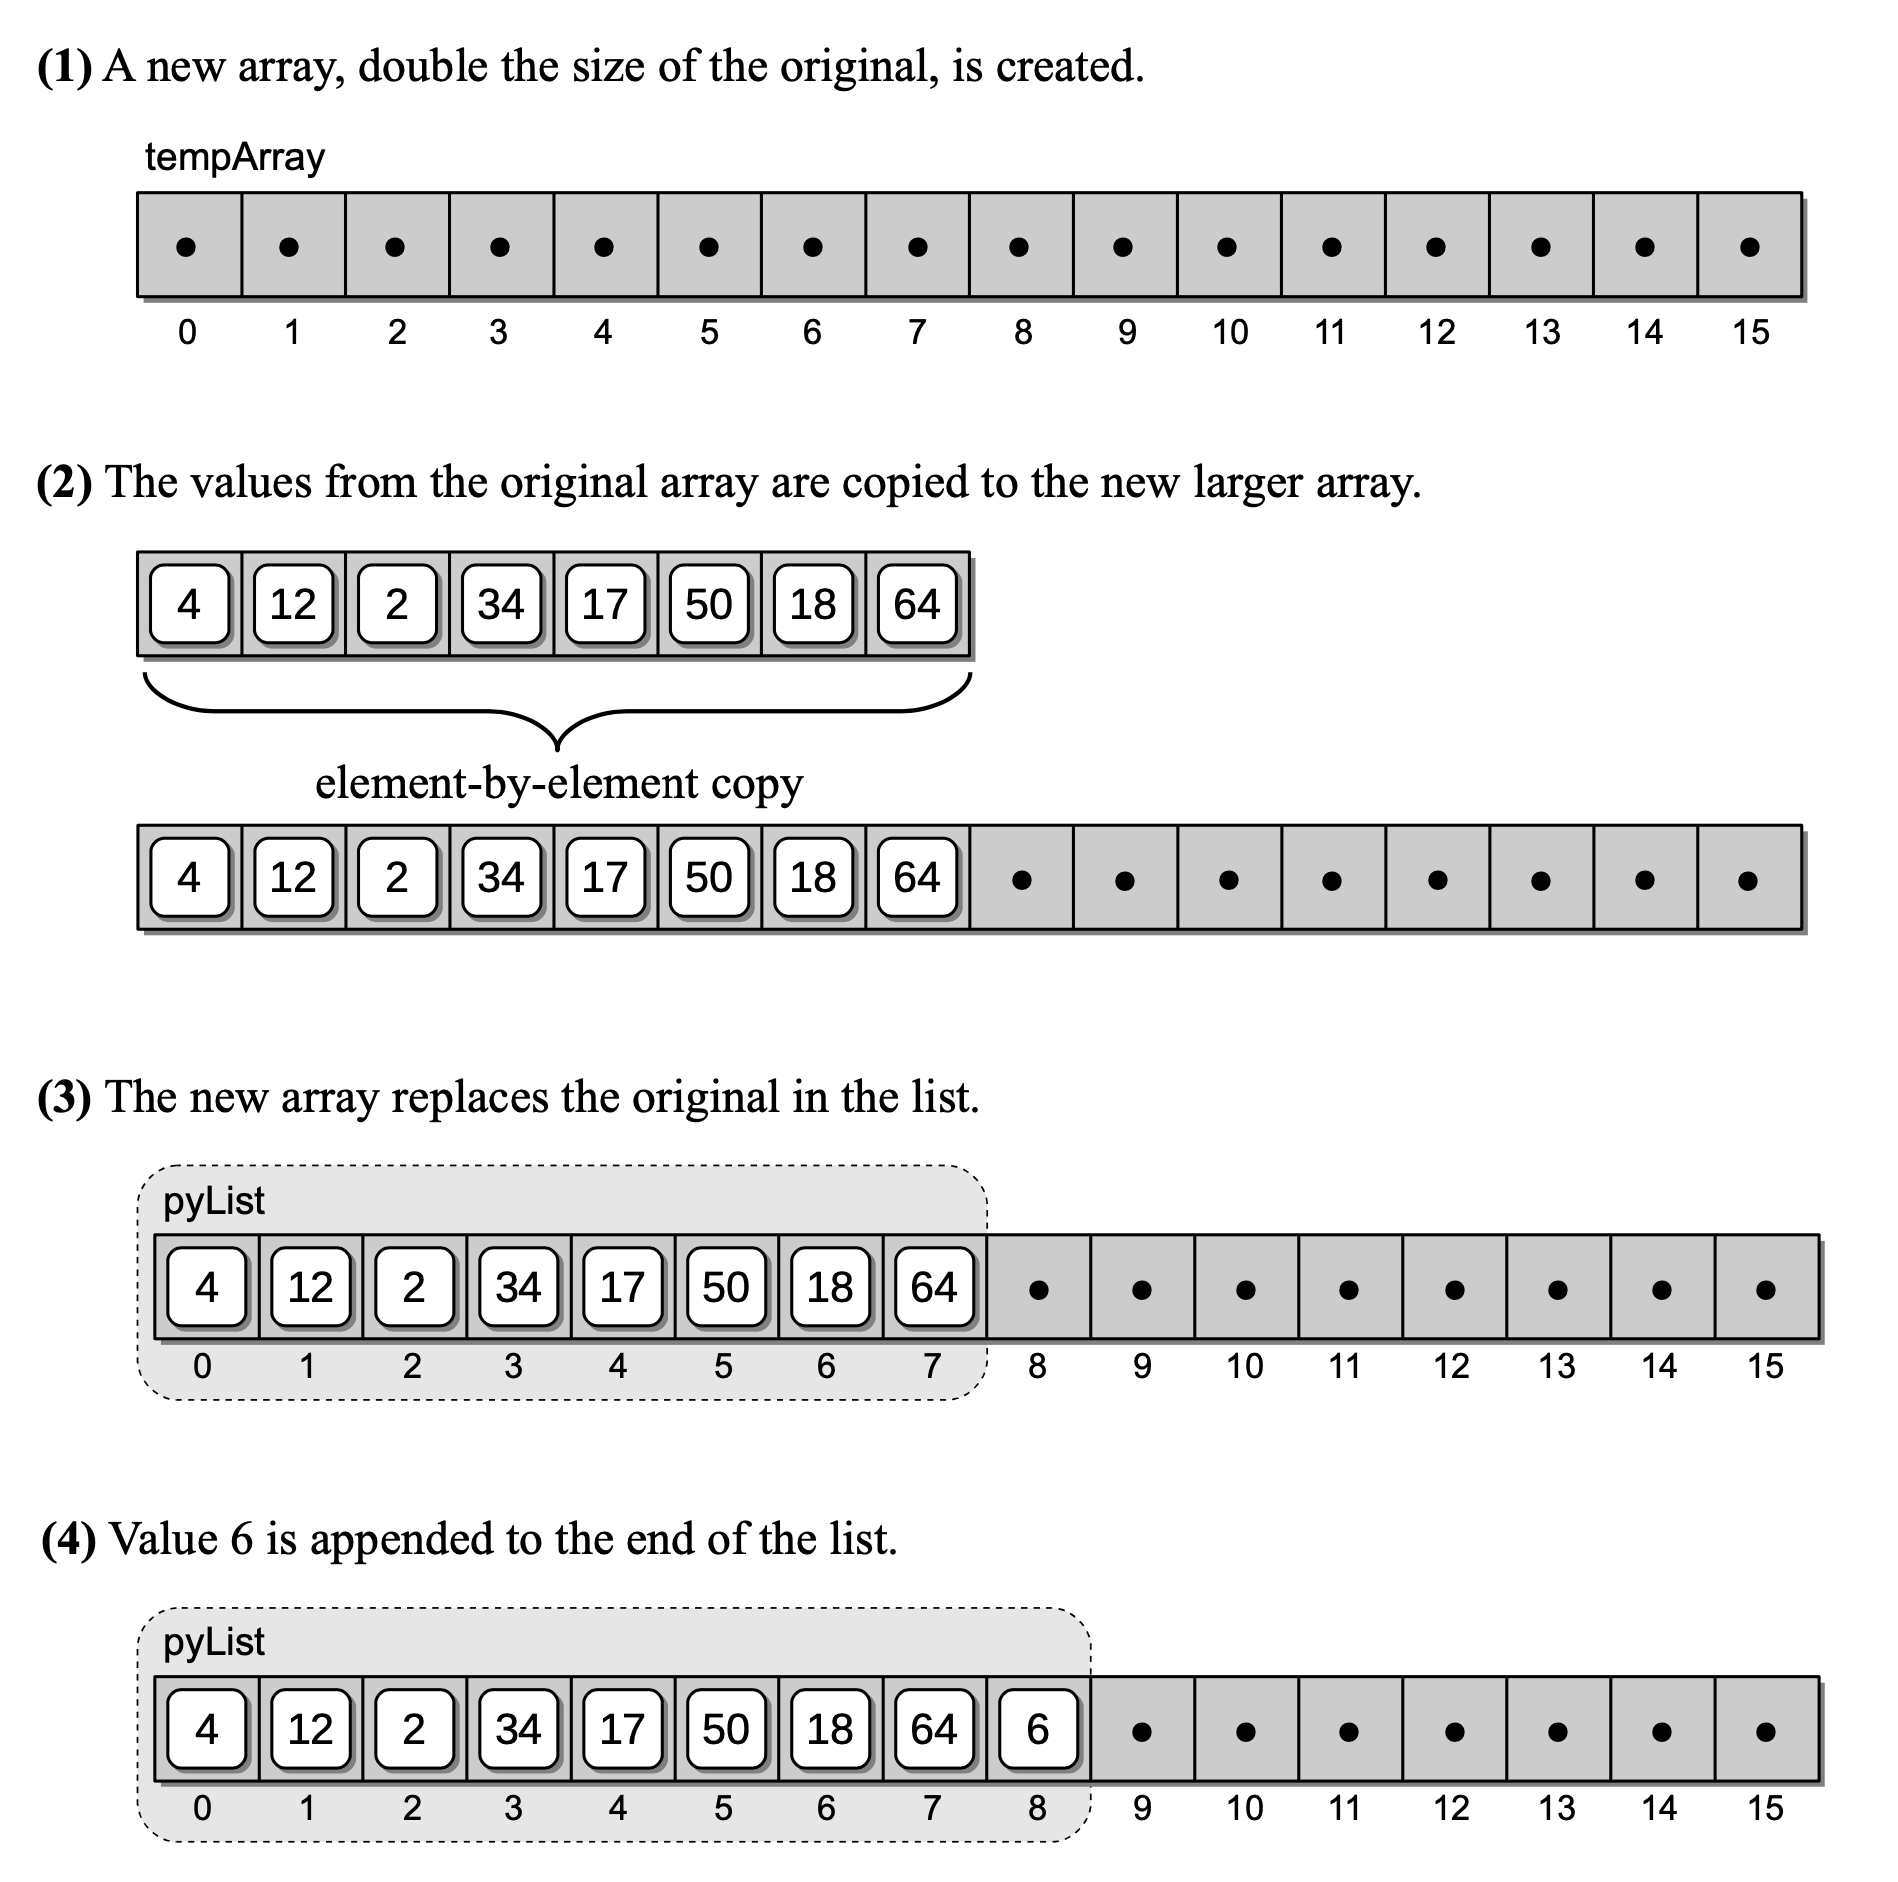

### 2.2.3 Extending A List
* **A list can be appended to a second list using the** extend() **method**
    * **If the list being extended has the capacity to store all of the elements from the second list, the elements are simply coped, element by element.**
    * **If there is not enough capacity for all of the elements, the underlying array has to be expanded.**
    * **The new array will be created larger than needed to allow more items to be added to the list without requiring an immediate expansion of the array.**
    * **After the new array is created, elements from the destination lust are copied to the new array followed by the source list.**

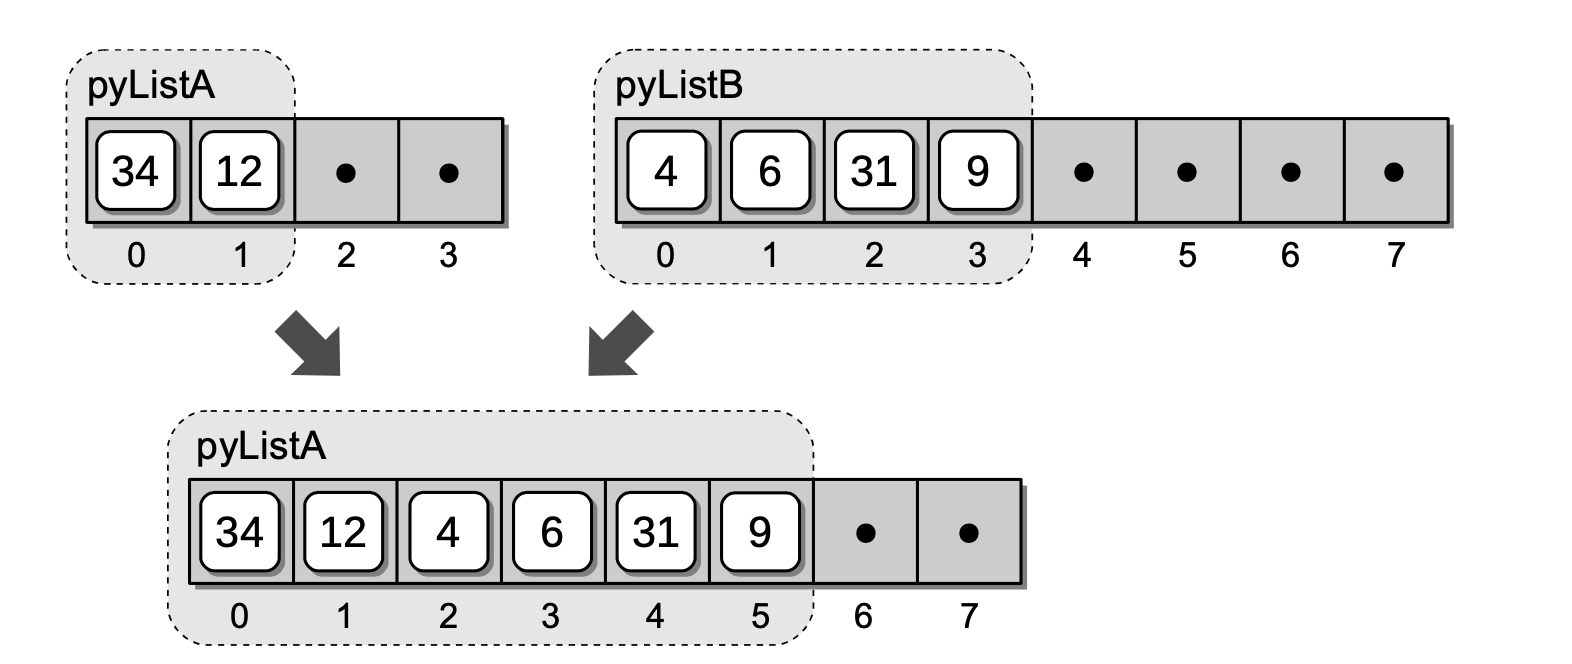

### 2.2.4 Inserting Items
* **Since there is already an item at that position, we must make room for the new item by shifting all of the items down one position.**
* **If there are no free slots for the new item, the list will be expanded**
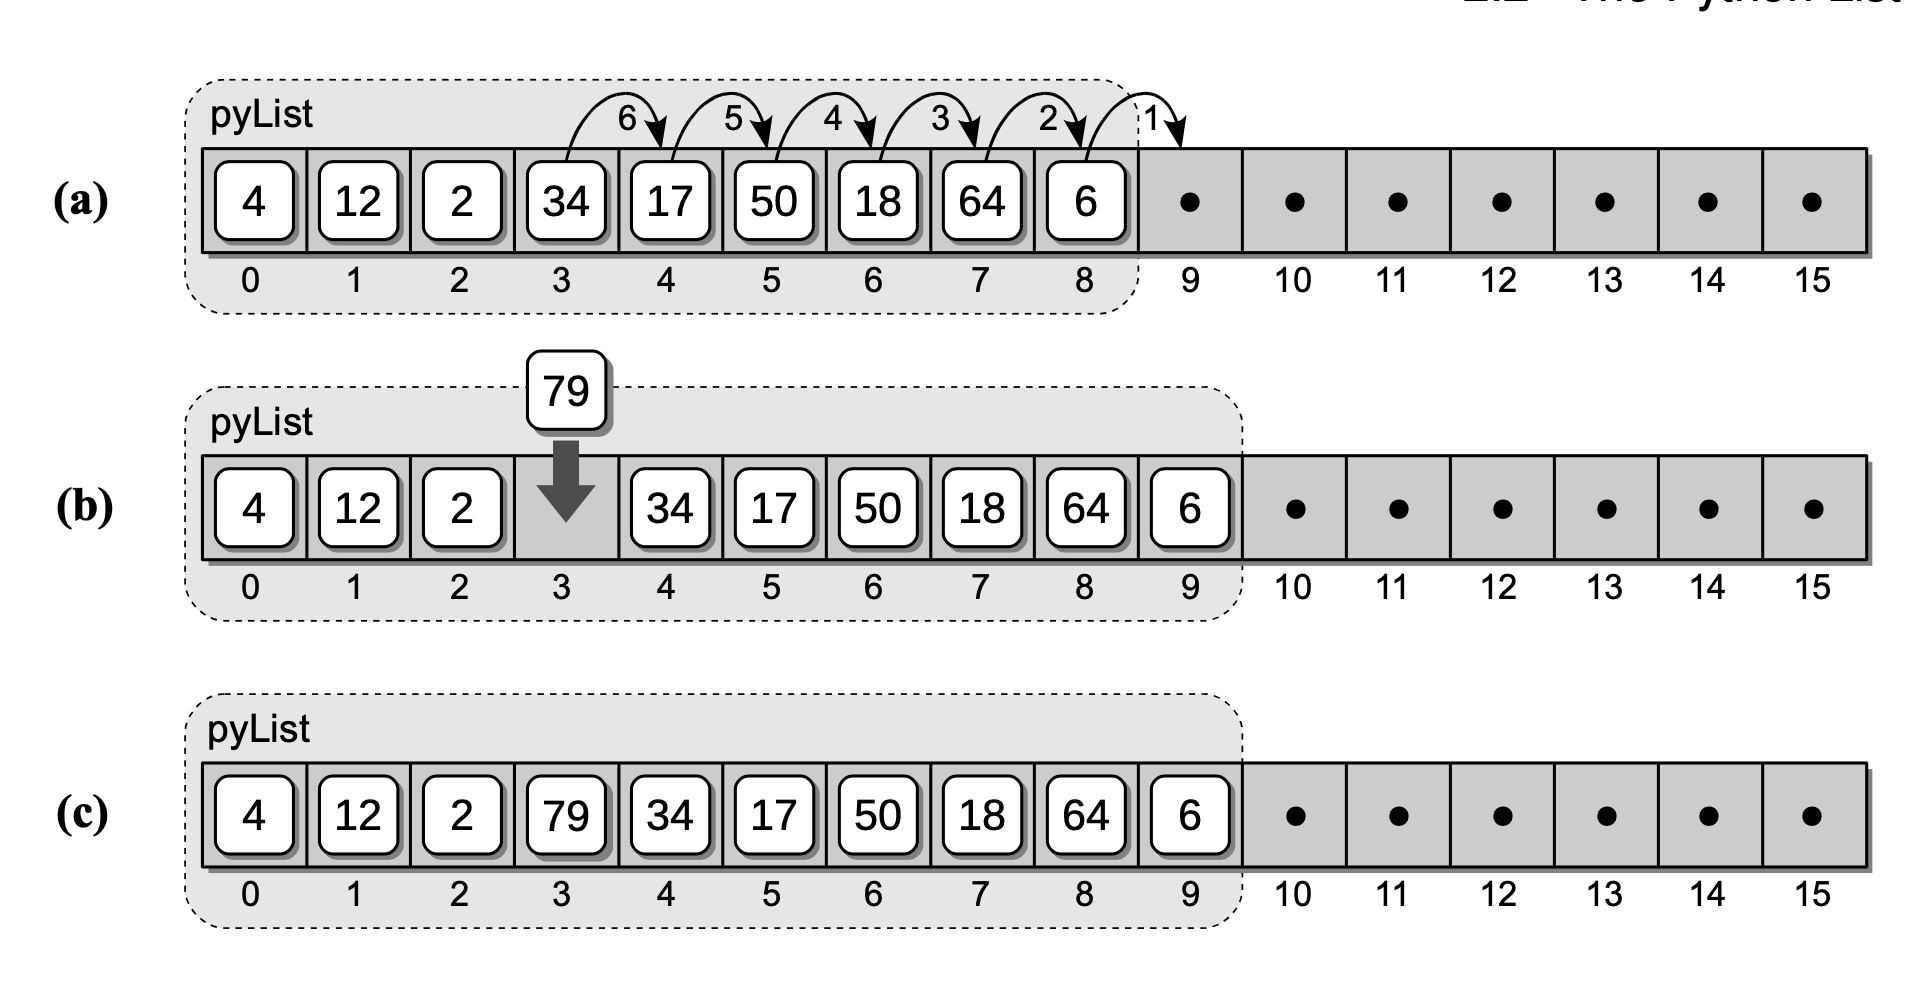

#### Removing Items
* **An item can be removed from any position within the list using the** pop( ) **method**

In [ ]:
pyList.pop( 0 )
pyList.pop()

* **First statement removes the first item from the list.**
* **After the item is removes, typically by setting the reference variable to** None, **the items following it within the array are shifted down, from left to right, to close the gap.**
* **Finally, the length of the list is decremented to reflect the smaller size.**
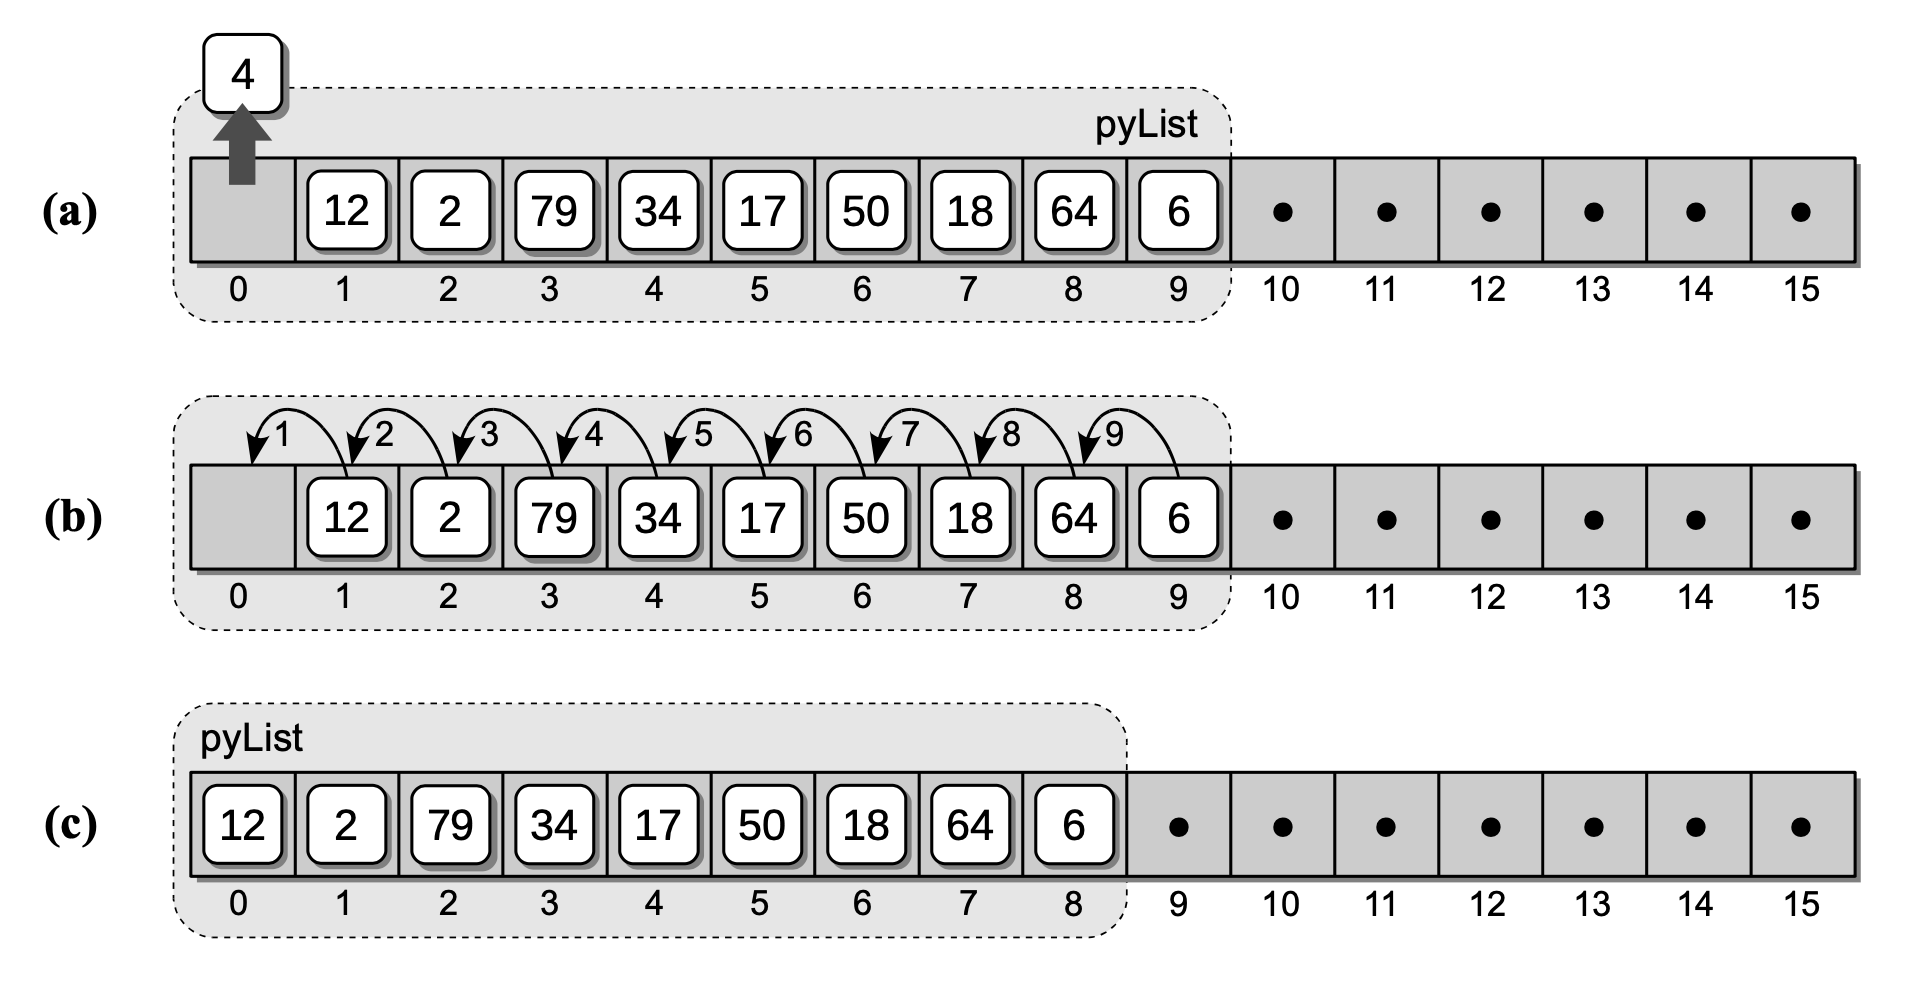
* **The second** pop( ) **operation in the example code removes the last item from the list.**
* **After removing an item from the list, the size of the array can also be reduced.**

### 2.2.5 List Slice
* **Slicing is an operation that creates a new list consisting of a contiguos subset of elements from the original list.**
    * **The original list is not modified by this operation. Instead, reference to the corresponding elements are copied and stored in the new list.**
    * **In Python, slicing is performed on a list using the colon operator and specifying the beginning element index and the number of elements included in the subset**
    * **To slice a list, a new list is created with a capacity large enough to store the entire subset of elements plus additional space for future insertions.**
    * **The elemnets within the specified range are then copied, element by element, to the new list.**
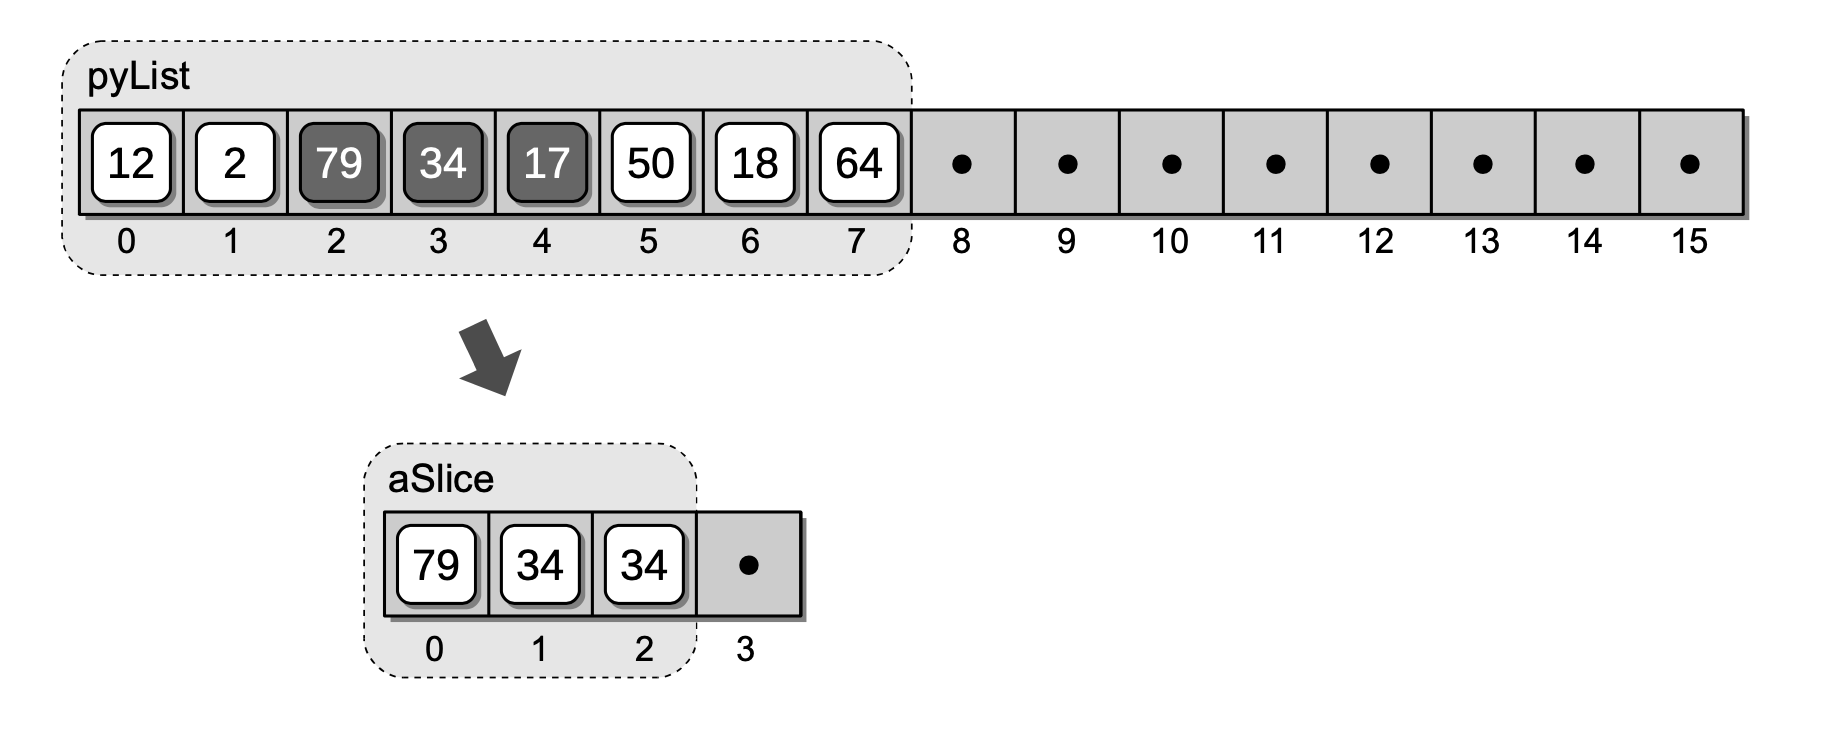

## 2.3 Two-Dimensional Arrays

### 2.3.1 The Array2D Abstract Data Type
* **Array2D ADT**
    * **A *two-dimensional array* consists of a collcetion of elements organized into rows and columns. Individual elements are referenced by specifying the specific row and column indices *(r,c)*, both of which start at 0.**
    * Array2D( nrow, ncols ): **Creates a two-dimensional array organized into rows and columns. The** nrows **and** ncols **arguments indicated the size of the table. The individual elements of the table are initialized to** None.
    * numRows( ) : **returns the number of rows in the 2-D array.**
    * numCols( ) : **returns the number of columns in the 2-D array.**
    * clear( value ): **clears the array by setting each element to a given** value.
    * getitem($i_1, i_2$): **returns the value stored in the 2-D array element at the position indicated by the 2-tuple ($i_1, i_2$), both of which must be within the valud range. Accessed using the subscript operator.**
    * setitem($i_1, i_2, value$): **modifies the contents of the 2-D array alement indicated by the 2-tuple ($i_1, i_2$)  with the new** value. **Both indices must be within the valid range. Accessed using the subscript operator.**
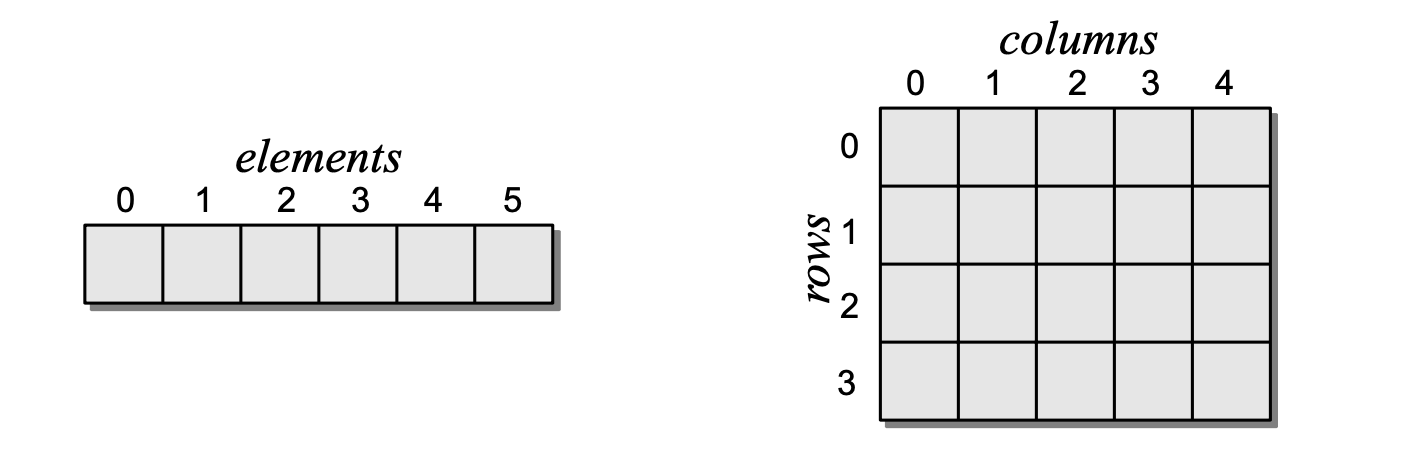

### 2.3.2 Implementing the 2-D Array
* **When using an array of arrays to store the elements of a 2-D array, we store each row of the 2-D array within its own 1-D array. Then, another 1-D array is used to store references to each of the arrays used to store the row elements**
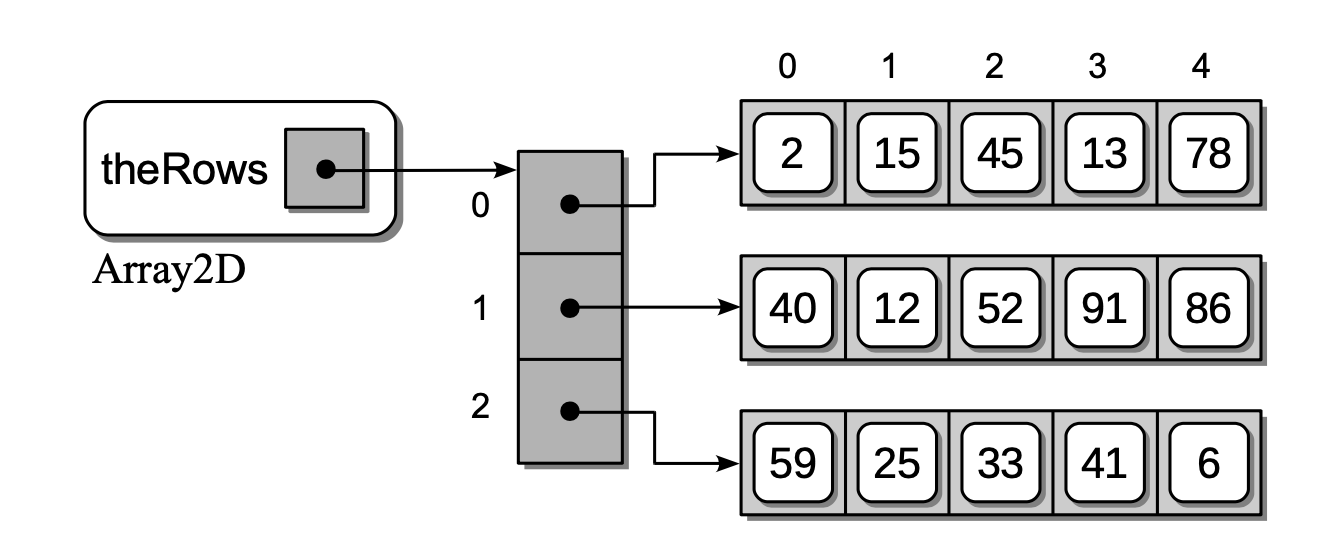

#### Basic Operations
* **The** numRows( ) **method can obtain the number of rows by checking the length of the main array, which contains an element for each row in the 2-D array**
* **To determine the number of columns in the 2-D array, the** numCols( ) **method can simply check the length of any of the 1-D arrays used to store the individual rows**
* **The** clear( ) **method can set every element to the given value by calling the** clear( ) **method on each of the 1-D arrays used to store the individual rows.**

#### Element Access
* **The python subscript opearator method** \_\_getitem\_\_, **takes a single index argument.**
    * **When a multiple component subscript is specified, Python automatically stored the components in a tuple in the order listed within the brackets and passes the tuple to the** ndxTuple **argument of the** \_\_getitem\_\_ **method**
* **After verifying both subscripts are within the valid range, we extract, from the data field** \_theRows, **the reference to the given row**

In [10]:
class Array2D:
#     creates a 2-D array of size numRows $\times$ numCols
    def __init__(self, numRows, numCols):
#         create a 1-D array to store an array reference to each row
        self._theRows = Array( numRows )
    
#     create the 1-arrays fir ehac row of the 2-D array
        for i in range( numRows ):
            self._theRows[i] = Array( numCols )
        
#   returns the number of rows in the 2-D array
    def numRows( self ):
        return len( self._theRows )
    
#   returns the number of columns in the 2-D array
    def numCols( self ):
        return len( self._theRows[0] )
    
#     clears he rray by setting vering element to the given value
    def clear( self, value ):
        for row in range( self.numRows() ):
            row.clear( value )

#   get the contents of the element at postion[i, j]
    def __getitem__( self, ndxTuple ):
        assert len(ndsTuple) == 2, "Invalid number of array subscripts."
        row = ndxTuple[0]
        col = ndxTuple[1]
        assert row >= 0 and row < self.numRows() and col >= 0 and col < self.numCols(), "array subscripts out of range"
        the1dArray = self._theRows[row]
        return the1dArray[col]
    
#     sets the contents of the element at position [i, j] to value
    def __setitem__( self, ndxTuple, value ):
        assert len(ndxTuple) == 2, "Invalid number of array subscripts"
        row = ndxTuple[0]
        col = ndxTuple[1]
        assert row >= 0 and row < self.numRows() and col >= 0 and col < self.numcols(), "array subscript out of range"
        the1dArray = self._theRows[row]
        the1dArray[ col ] = value
    

## 2.4 The Matrix Abstract Data Type
* **The Matrix ADT**
    * **A *matrix* is a collection of scalar values arranged in rows and columns as recrangular grid of fixed size.The elements of the matrix can be accessed by specifying a given row and column index with indices starting at 0.**
* Matrix( rows, ncols ): **creates a new matrix containing** nrows **and** ncols **with each element initialized to** 0
* numRows( ): **returns the number of rows in the matrix.**
* numCols( ): **returns the number of columns in the matrix.**
* getitem( ): **returns the value stored in the given matrix element. Both row and col must be within the same range.**
* scaleBy( scalar ) : **multiples each element of the matrix by the given scalar value. The matrix is multiplied by this operation.**
* transpose( ): **returns a new matrix that is the transpose of this matrix.**
* add( rhsMatrix ) : **ceates and returns a new matrix that is the result of adding this matrix to the given matirx.**
* subtract( rhsMatrix ): **The same as** add( ) **but subtracts the two matrices.**
* multiply( rhsMatrix ): **Creates and returns a new matrix that is the result of multiplying this matrix to the given** rhsMatrix. **The two matrices must be of appropriate sizes.**

### 2.4.1 Matrix Operations

#### Addition and Subtraction. 
* **Two $ m \times n$ matrix can be added or subtracted to create a third $ m \times n $ matrix. When adding two $ m \times n $ matrices, corresponding elements are summed.**
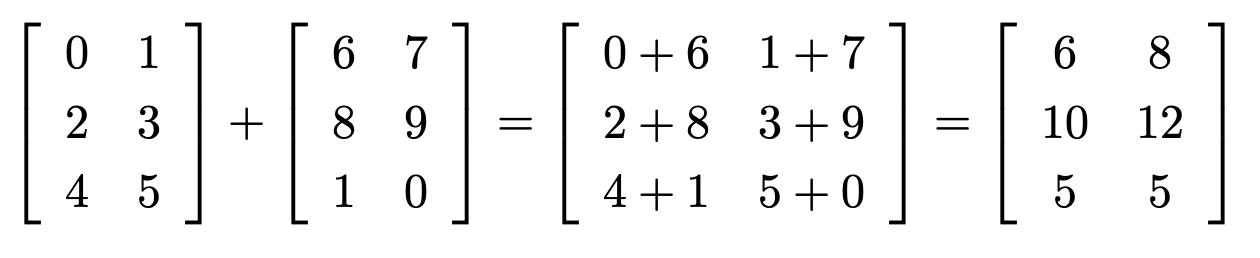

#### Scaling
* **A matrix can be uniformly scaled, which modifies each element by the same factor**
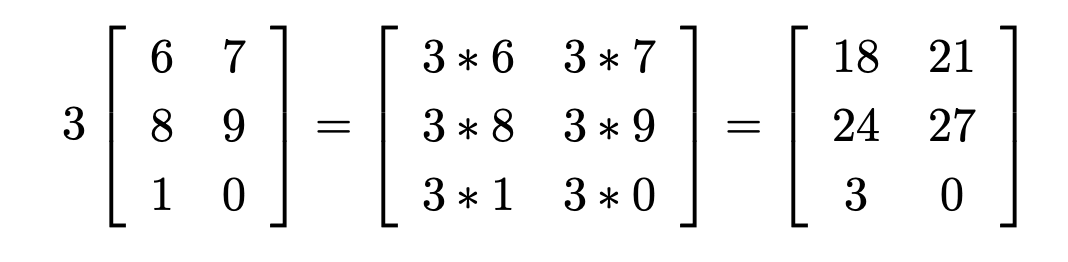

#### Multiplication
* **Matrix multiplicationn is only defined for matrices where the number of columns in the matrix on the lefthand side is equal to the number of rows in the matrix on the righthand side.**
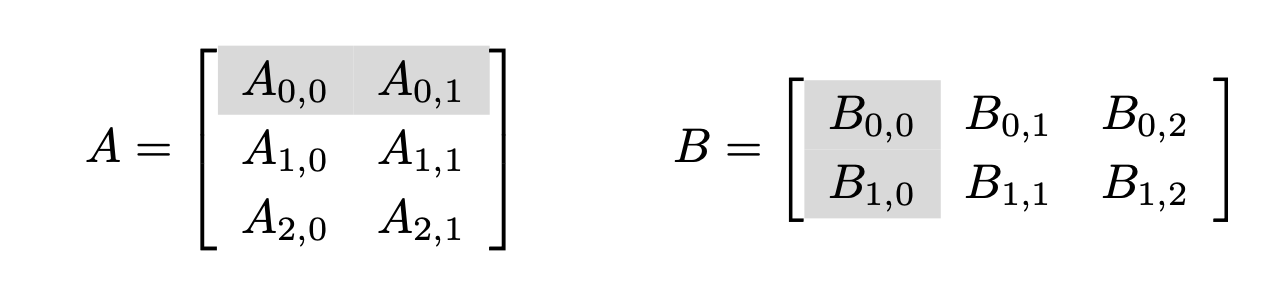
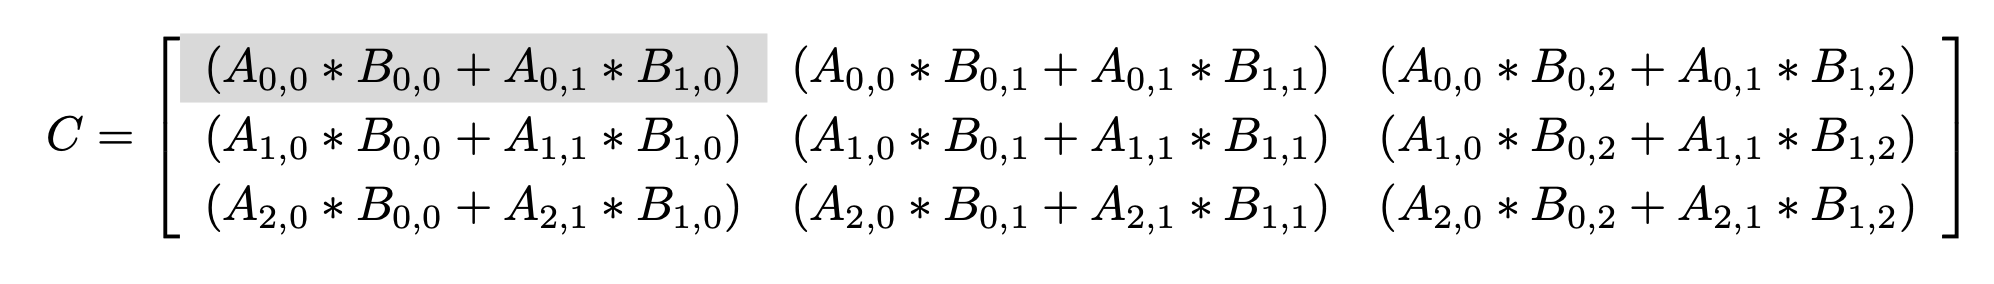

#### Transpose
* **Given a $ m \times n$ matrix, a transpose swaps the rows and columns to create a new matrix of size $ n \times m $**
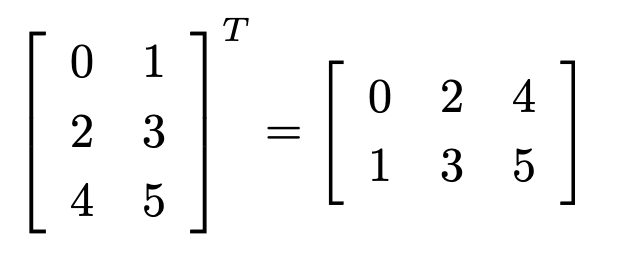

### 2.4.2 Implementing the Matrix
* **The** numRows( ) **and** numCols( ) **methods return the lenght of the corresponding dimension of the 2-D array.**
* **The validation of the precondition is omitted here since we know the correponding methods of the** Array2D **class have the same precondtions and they are verified by that class.**

In [12]:
# Implementation of the Matrix ADT using 2-D array

class Matrix:
    # creates a matrix of size numRows x numCols initialized to 0
    def __init__( self, numRows, numCols ):
        self.__theGrid = Array2D( numRows, numCols )
        self._theGrid.clear( 0 )
    
    # returns the number of rows in the matrix
    def numRows( self ):
        return self._theGrid.numRows()
    
    #returns the number of columns in the matrix
    def numCols( self ):
        return self._theGrid.numCols()
    
    #returns the value of the element (i, j): x[i, j]
    def __getitem__( self, ndxTuple ):
        return self._theGrid[ ndxTuple[0], ndxTuple[1] ]
    
    #sets the vale of element (i, j) to the value s: x[i, j] = s
    def __setitem__( self, ndxTuple, scalar ):
        self._theGrid[ ndxTuple[0], ndxTuple[1] ] = scalar
        
    #scales the matrix by the given scalar
    def scaleBy( self, scalar ):
        for r in range( self.numRows() ):
            for c in range( self.numCols()):
                self[r, c] *= scalar
                
    def __add__( self, rhsMatrix ):
        assert rhsMatrix.numRows() == self.numRows() and rhsMatrix.numCols == self.numCols, "Matrix sizes not compatible for the add operation"
        #create the new matrix
        newMatrix = Matrix( self.numRows(), self.numCols )
        # Add the corresponding elements in the two matrices
        for r in range( self.numRows() ):
            for c in range( self.numCols() ):
                newMatrix[r, c] = self[r, c] + rhsMatrix[r, c]
        return newMatrix

## 2.5 Application: The Game of Life
### 2.5.1 Rules of the Game

1. **If a cell is alive and has either two or three neighbors, the cell remains alive in the next generation. The neighbors are the eight cells immediately surrounding a cell: vertically, horizontally, and diagonally.**
1. **A living cell that has no live  neighbors or a single live neighbor dies from isolation in the next generation.**
1. **A living cell that has four or more live neighbors die from overpopulation in the next generation.**
1. **A dead cell with exactly three live neighbours results in a birth and becomes alive in the next generation. All other dead cells remain dead in the next generation.**
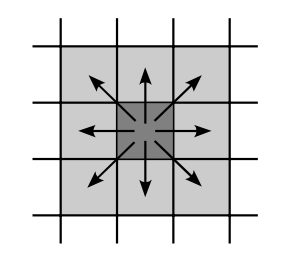

### 2.5.2 Designing a Solution
* **Life Grid ADT**
* **A *life grid* is used to represent and stroe the area in the game of Life that contains organsims. The grid contains a rectangular grouping of cells of a finite size divided into rows and columns. The inidividual cell,s which can be alive or dead, are referenced by row and column indices, both of which start at zero.**
* LifeGrid(neows, ncols): **creates a new game grid consisting of** nrows **and** ncols. **All cells in the grid are set to dead.**
* numRows( ): **returns the number of rows in the grid.**
* numCols( ): **returns the number of columns in the grid.**
* configure(coordList): **configures the grid for evolving the next generation. The** coordList **argument is the sequence of 2-tuples with each tuple representing the coordinates *(r,c)* of the cells to be set as alive.**
* clearCell(row, col): **clears the individual cell** (row, col) **and sets it to dead.The cell indices must be within the valid range of the grid.**
* setCell(row, col): **sets the indicated cell** (row, col) **to be alive.The cell indices must be within the valid range of the grid.**
* numLiveNeighbors( row, col ): **returns the number of live neighbors for the given cell** (row, col). **The neighnbors of a cell include all of the cells immediately surrounding it in all directions. For the cells along the border of the grid, the neighbors that fall outside the grid are assumed to be dead. The cell indices must be within the valid range of the grid.**

### 2.5.3 Implementation 
* **Two constant variable are initialized to store the values used to mark the cells within the game grid.** 
* **The constants are defined within the class itsled and outside of the method since they are not actual data fields.**
* **The** configure( ) **method clears the cells by setting each to a dead oragnism. It the iterates through the coordinate list and uses the** setCell() **method to set the live cells**

In [22]:
class LifeGrid:
    #define the constants to represent the cell states
    DEAD_CELL = 0
    LIVE_CELL = 1
    
    #create the game grid and initializes the cells to dead
    def __init__(self, numRows, numCols):
        #allocate the 2-d array for the grid
        self._grid = Array2D( numRows, numCols )
        #clear the grid and set all cells to dead
        self.configure( list() )
        
    #returns the number of rows in the grid
    def  numRows( self ):
        return self._grid.numRows()
    
    #returns the number of columns in the grid
    def numCols( self ):
        return self._grid.numCols()
    
    # configures the grid to contain the given live cells
    def configure( self, coordList ):
        #Clear rhe game grid
        for i in range( numRows ):
            for j in range( numCols ):
                self.clearCell( i, j )
        
        #set the indicated cells to be alive
        for coord in coorList:
            self.setCell( coord[0], coord[1] )
            
    #does the indicated cell contain a luve organsim
    def isLiveCell( self, row, col ):
        return self._grid[row, col] == LIVE_CELL
    
    # clears the indicarted cell by setting it to dead
    def clearCell( sel, row, col ):
        self._grid[row, col] = DEAD_CELL

In [23]:
#genertes the next generation of organisms
def evolve( grid ):
    #list for storing the live cells of the next generation
    liveCells = list()
    
    # Iterate over the elements of the grid
    for i in range( grid.numRows() ):
        for j in range( grid.numCols() ):
            
            # Determine the number of live neighbors for this cell
            neighbors = grid.numLiveNeighbors(i, j )
            
            # add the (i, j) tuple to liveZCells if this cell contains 
            # a live organism in the next generation
            if (neighbors == 2 and grid.isLiveCell( i, j )) or (neighbors == 3):
                liveCell.append( (i, j))

In [25]:
%%bash
git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   chapter_1_ADT.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	chapter_2_array.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
%%bash
git add "chapter_2_array."